In [263]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [264]:
df1 = pd.read_csv('../Scraped_Data/all jobs part 1 2020-05-30.csv')
df2 = pd.read_csv('../Scraped_Data/all jobs part 2 2020-05-30.csv')

In [265]:
job_trends = pd.concat([
    df1,df2
],ignore_index=True).drop_duplicates().reset_index(drop=True)

In [246]:
job_trends.head(5)

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description
0,5a5a6bb65133edb5,Auto Service Advisor,A-Protect Warranty Corporation,"Concord, ON","$40,000 - $60,000 a year",None,None,Just posted,A-Protect Warranty Corp is looking for an auto...
1,2e73a22f30099b50,HR Administrator,Fresh mind solutions,"Toronto, ON",None,None,None,Just posted,Looking for experienced IT Sales person for ou...
2,e066713b39ecbfba,Labour Relations Manager,Metro Inc.,"Toronto, ON",None,3.6,None,Just posted,Position Title:|Labour Relations Manager|Requi...
3,792e556f0f07c6b2,Barista,Second Cup @ Bathurst/Lawrence,"North York, ON",$14 - $15 an hour,None,None,Just posted,Second Cup is looking for a responsible and en...
4,afa8e00305ac0667,General Labourer - $14.50/HR,Capital Staffing Solutions Inc.,"Toronto, ON",$14.50 an hour,4.4,None,Just posted,Location:|Etobicoke (Kipling and The Queensway...


In [133]:
job_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29155 entries, 0 to 29154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Primary_Key       29155 non-null  object
 1   Title             29155 non-null  object
 2   Company           29155 non-null  object
 3   Location          29155 non-null  object
 4   Salary            29155 non-null  object
 5   Ratings           29155 non-null  object
 6   Remote_work       29155 non-null  object
 7   Date_posted       29155 non-null  object
 8   Full_Description  29155 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [134]:
primary_key_count = job_trends.Primary_Key.value_counts()

In [135]:
# Print all the primary_key_count > 0 (1 or more)
print([primary_key_count>0])

[4aa9a1427e9d7ea1    True
86c4ef0cbb47f756    True
47ac4e50c8d399be    True
1501224af9b561a2    True
cf9f935bd553e83c    True
                    ... 
7fe49ee467f49057    True
d74d6fa2811df186    True
c9a854d0816e6cca    True
40c69bc139fef492    True
c9b73b0cc7c10de1    True
Name: Primary_Key, Length: 29155, dtype: bool]


In [136]:
# Print all the primary_key_count > 1 (2 or more)
print(primary_key_count[primary_key_count>1])

Series([], Name: Primary_Key, dtype: int64)


In [137]:
# we don't need to data mine primary key: so drop it (it's purpose has been filled)
# job_trends = job_trends.drop(columns=['Primary_Key'])
# full description is computation heavy, so we will explore it later
# job_trends_NoDesc = job_trends.drop(columns=['Full_Description'])

In [138]:
job_trends.describe(include='all')

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description
count,29155,29155,29155,29155,29155,29155,29155,29155,29155
unique,29155,21437,15660,2959,3033,42,2,32,27672
top,4aa9a1427e9d7ea1,Customer Service Representative,Randstad,"Calgary, AB",None,None,None,1 day ago,None
freq,1,109,171,1427,16579,12011,26970,7938,97


## Title NLP

In [139]:
# fix this error later
job_trends.loc[:,'title_length'] = job_trends['Title'].apply(len)

In [140]:
job_trends.describe()

,title_length
count,29155.000000
mean,29.702281
std,15.194788
min,2.000000
25%,19.000000
50%,27.000000
75%,37.000000
max,148.000000


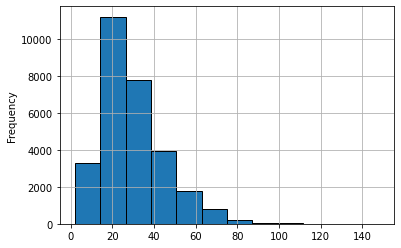

In [141]:
job_trends['title_length'].plot(bins=12, kind='hist',edgecolor='black',linewidth='1', grid=True)

In [142]:
job_trends[job_trends['title_length'] < 10]['Title'].iloc[0]

'Barista'

In [143]:
job_trends['Title'].nunique()

21437

In [144]:
#removes special charaters and numbers
job_trends['Title_word_list'] = job_trends['Title'].map(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x))
#split into list at space
job_trends['Title_word_list'] = job_trends['Title_word_list'].str.split(' ')
job_trends.head()

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description,title_length,Title_word_list
0,5a5a6bb65133edb5,Auto Service Advisor,A-Protect Warranty Corporation,"Concord, ON","$40,000 - $60,000 a year",None,None,Just posted,A-Protect Warranty Corp is looking for an auto...,20,"[Auto, Service, Advisor]"
1,2e73a22f30099b50,HR Administrator,Fresh mind solutions,"Toronto, ON",None,None,None,Just posted,Looking for experienced IT Sales person for ou...,16,"[HR, Administrator]"
2,e066713b39ecbfba,Labour Relations Manager,Metro Inc.,"Toronto, ON",None,3.6,None,Just posted,Position Title:|Labour Relations Manager|Requi...,24,"[Labour, Relations, Manager]"
3,792e556f0f07c6b2,Barista,Second Cup @ Bathurst/Lawrence,"North York, ON",$14 - $15 an hour,None,None,Just posted,Second Cup is looking for a responsible and en...,7,[Barista]
4,afa8e00305ac0667,General Labourer - $14.50/HR,Capital Staffing Solutions Inc.,"Toronto, ON",$14.50 an hour,4.4,None,Just posted,Location:|Etobicoke (Kipling and The Queensway...,28,"[General, Labourer, HR]"


In [145]:
def text_process_B(mess):
    """
    Takes in a string of text, then performs the following:
    1. Eliminate strings below a certain lenght
    """
    value = [char for char in mess if len(char) > 3]
    
    return value

In [146]:
job_trends['Title_word_list'] = job_trends['Title_word_list'].apply(text_process_B)
job_trends.head()

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description,title_length,Title_word_list
0,5a5a6bb65133edb5,Auto Service Advisor,A-Protect Warranty Corporation,"Concord, ON","$40,000 - $60,000 a year",None,None,Just posted,A-Protect Warranty Corp is looking for an auto...,20,"[Auto, Service, Advisor]"
1,2e73a22f30099b50,HR Administrator,Fresh mind solutions,"Toronto, ON",None,None,None,Just posted,Looking for experienced IT Sales person for ou...,16,[Administrator]
2,e066713b39ecbfba,Labour Relations Manager,Metro Inc.,"Toronto, ON",None,3.6,None,Just posted,Position Title:|Labour Relations Manager|Requi...,24,"[Labour, Relations, Manager]"
3,792e556f0f07c6b2,Barista,Second Cup @ Bathurst/Lawrence,"North York, ON",$14 - $15 an hour,None,None,Just posted,Second Cup is looking for a responsible and en...,7,[Barista]
4,afa8e00305ac0667,General Labourer - $14.50/HR,Capital Staffing Solutions Inc.,"Toronto, ON",$14.50 an hour,4.4,None,Just posted,Location:|Etobicoke (Kipling and The Queensway...,28,"[General, Labourer]"


In [156]:
Title_series = job_trends['Title_word_list']
Title_words_list = Title_series.to_list()
Title_flat_list = [item for sublist in Title_words_list for item in sublist]
Title_words_df = pd.DataFrame(Title_flat_list, columns = ['Title_Words'])


job_trends = job_trends.drop(['title_length', 'Title_word_list'], axis=1)

In [157]:
Title_words_df.head()

,Title_Words
0,Auto
1,Service
2,Advisor
3,Administrator
4,Labour


In [158]:
Title_words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95281 entries, 0 to 95280
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title_Words  95281 non-null  object
dtypes: object(1)
memory usage: 744.5+ KB


In [159]:
Title_words_df.Title_Words.nunique()

9547

In [160]:
# Only get the where count is more than a certain value
Title_Words_count = Title_words_df.Title_Words.value_counts()
Title_Words_count = Title_Words_count[Title_Words_count>600]

In [161]:
Title_Words_count.count()

17

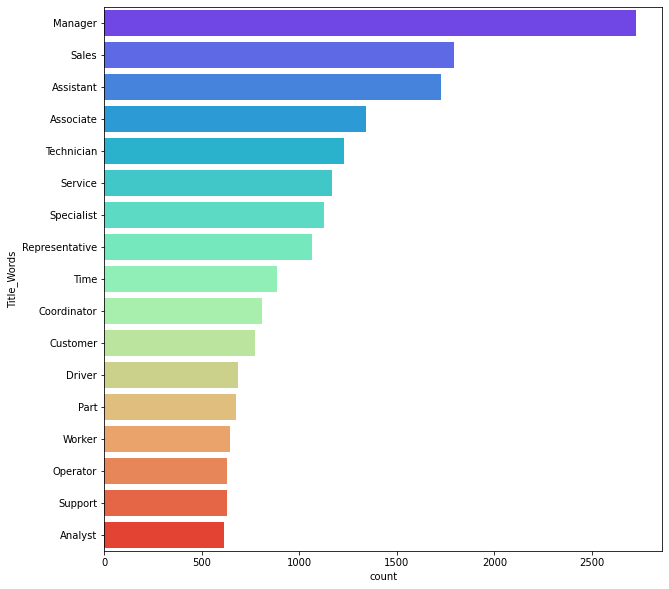

In [162]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.countplot(y='Title_Words',data=Title_words_df,palette='rainbow', 
              order = Title_Words_count.index)

## Location NLP

In my <b>earlier version</b> of data scraping code.I scared all location data <b>with seprator '|'.</b> Now i have to remove the extra info, that is the zip/postal codes mostly. To just <b>get the city and state</b>

In [266]:
#split into list at '|' and get first word
job_trends['Location'] = job_trends['Location'].str.split('|').str[0]
#removes any leading and trailing spaces
job_trends['Location'] = job_trends['Location'].str.strip()

In [267]:
#removes special charaters and numbers
# job_trends['Location_New'] = job_trends['Location'].map(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x))

#split into list at ' ' and get last word(s)
job_trends['State'] = job_trends['Location'].str.split(',').str[-1]
# to remove postal code(in numbers)
job_trends['State'] = job_trends['State'].map(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x))
#removes any leading and trailing spaces
job_trends['State'] = job_trends['State'].str.strip()

#split into list at ' ' and get first word(s)
job_trends['City'] = job_trends['Location'].str.split(',').str[0]

In [268]:
job_trends.head()

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description,State,City
0,5a5a6bb65133edb5,Auto Service Advisor,A-Protect Warranty Corporation,"Concord, ON","$40,000 - $60,000 a year",None,None,Just posted,A-Protect Warranty Corp is looking for an auto...,ON,Concord
1,2e73a22f30099b50,HR Administrator,Fresh mind solutions,"Toronto, ON",None,None,None,Just posted,Looking for experienced IT Sales person for ou...,ON,Toronto
2,e066713b39ecbfba,Labour Relations Manager,Metro Inc.,"Toronto, ON",None,3.6,None,Just posted,Position Title:|Labour Relations Manager|Requi...,ON,Toronto
3,792e556f0f07c6b2,Barista,Second Cup @ Bathurst/Lawrence,"North York, ON",$14 - $15 an hour,None,None,Just posted,Second Cup is looking for a responsible and en...,ON,North York
4,afa8e00305ac0667,General Labourer - $14.50/HR,Capital Staffing Solutions Inc.,"Toronto, ON",$14.50 an hour,4.4,None,Just posted,Location:|Etobicoke (Kipling and The Queensway...,ON,Toronto


In [269]:
job_trends.State.unique()

array(['ON', 'Ontario', 'Canada', 'QC', 'Quebec Province', 'BC',
       'British Columbia', 'AB', 'Alberta', 'MB', 'Manitoba', 'NY', 'CA',
       'California', 'United States', 'IL', 'IN', 'Illinois', 'TX',
       'Texas', 'AZ', 'Arizona', 'PA', 'Pennsylvania', 'NJ', 'DE'],
      dtype=object)

In [270]:
job_trends['State'] = job_trends['State'].replace(['ON'], 'Ontario')
job_trends['State'] = job_trends['State'].replace(['QC'], 'Quebec Province')
job_trends['State'] = job_trends['State'].replace(['AB'], 'Alberta')
job_trends['State'] = job_trends['State'].replace(['BC'], 'British Columbia')
job_trends['State'] = job_trends['State'].replace(['MB'], 'Manitoba')

job_trends['State'] = job_trends['State'].replace(['IL'], 'Illinois')
job_trends['State'] = job_trends['State'].replace(['CA'], 'California')
job_trends['State'] = job_trends['State'].replace(['PA'], 'Pennsylvania')
job_trends['State'] = job_trends['State'].replace(['AZ'], 'Arizona')
job_trends[['State']] = job_trends[['State']].replace('TX', 'Texas')

In [272]:
job_trends.State.unique()

array(['Ontario', 'Canada', 'Quebec Province', 'British Columbia',
       'Alberta', 'Manitoba', 'NY', 'California', 'United States',
       'Illinois', 'IN', 'Texas', 'Arizona', 'Pennsylvania', 'NJ', 'DE'],
      dtype=object)

In [275]:
job_trends.loc[job_trends['State'] == 'DE']

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted,Full_Description,State,City
21930,773b3a11484b1950,Dishwasher,Anthony's Coal Fired Pizza - Wilmington,"Wilmington, DE 19803",None,None,None,Just posted,Leading the industry as one of the fastest gro...,DE,Wilmington
21943,23b806e07ef6213d,Janitorial / Maintenance,Anthony's Coal Fired Pizza - Wilmington,"Wilmington, DE 19803",None,None,None,Just posted,Anthony’s Coal Fired Pizza is looking for pass...,DE,Wilmington
21946,3913587d8fcd3ec7,Fitness Instructor,Orangetheory Fitness- Talleyville,"Wilmington, DE 19803",$45 - $65 an hour,None,None,Just posted,"We are looking for a|HIGH ENERGY, MOTIVATIONAL...",DE,Wilmington
21952,f29dcba9837c2a53,Customer Service Representative,MI Insurance Agency Inc.,"Wilmington, DE","$55,000 - $70,000 a year",None,None,Today,Customer Service Representative:|We're looking...,DE,Wilmington
21963,648d7399a8b8c001,Access Center Specialist ll,Nemours,"Wilmington, DE 19803",None,3.8,None,Today,As one of the nation’s leading pediatric healt...,DE,Wilmington
22019,e987acbbedf1584d,Judicial Case Processor III,State of Delaware,"Wilmington, DE",None,3.7,None,Today,This is the advanced level of case processing....,DE,Wilmington
22044,454ca7bb54ccf69e,Tax Auditor I (Limited Term,State of Delaware,"Wilmington, DE 19801",None,3.7,None,Today,This position will review taxpayer filings and...,DE,Wilmington
22052,f12d3dfb146398b4,Team Member,Mitra QSR KNE,"Claymont, DE",None,None,None,Today,You are the face of KFC! You are the first per...,DE,Claymont
22055,76e7fbad2d063dfb,Head of Internal Audit,Incyte Corporation,"Wilmington, DE 19803",None,3.8,None,Today,Incyte is a biopharmaceutical company focused ...,DE,Wilmington
22059,3ff2cfeb0cd607f8,Social Worker/Case Manager Supervisor,State of Delaware,"Wilmington, DE 19802",None,3.7,None,Today,The incumbent in this position supervises 7-10...,DE,Wilmington


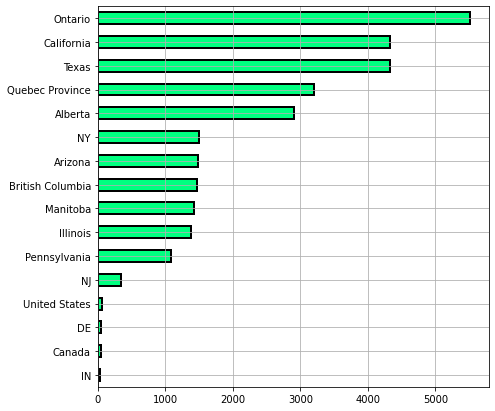

In [278]:
plt.rcParams['figure.figsize'] = [7, 7]
job_trends.State.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='2', grid=True,colormap ='winter_r')